<a href="https://colab.research.google.com/github/Neeraton/CPP/blob/main/plat_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

print(tf.__version__)  # Should print 2.17.0


2.17.0


In [4]:
train_data_path = "/content/drive/MyDrive/Mini_pp/train"
validation_data_path = "/content/drive/MyDrive/Mini_pp/val"

In [5]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [6]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 1951 images belonging to 4 classes.


In [7]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [8]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 324 images belonging to 4 classes.


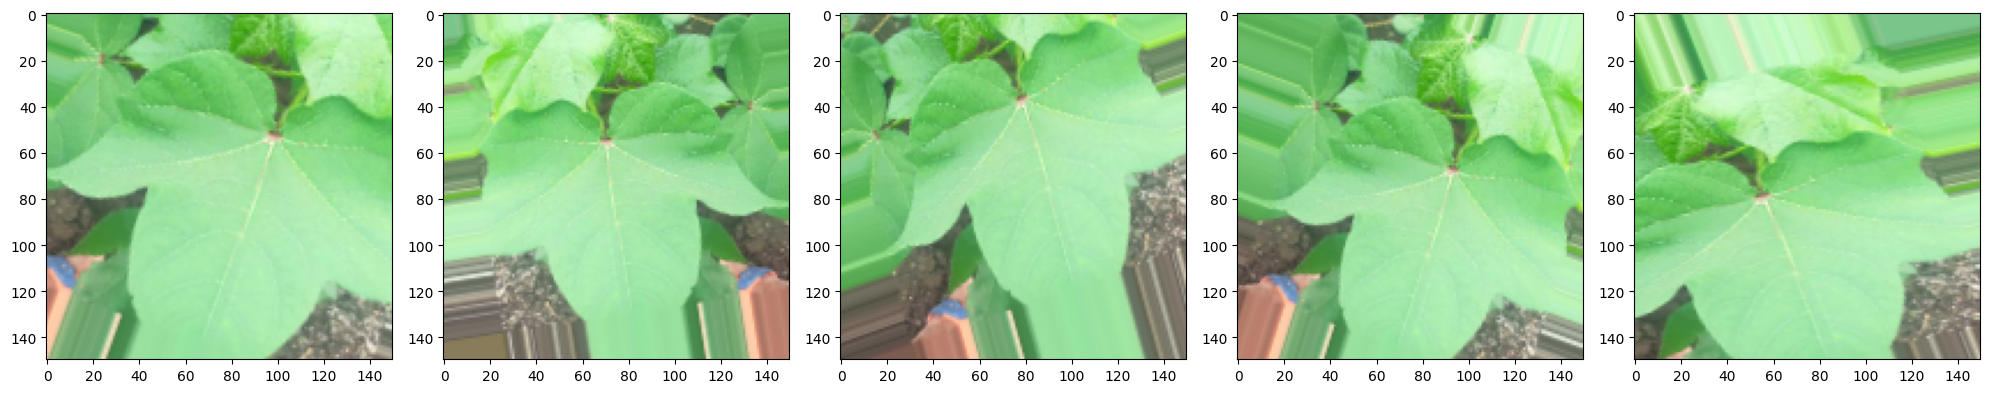

In [9]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [10]:
# save best model using vall accuracy
model_path = '/content/drive/MyDrive/Mini_pp/s.keras'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [11]:
from tensorflow import keras

In [12]:
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),
                                    keras.layers.Dense(units=256, activation='relu'),
                                    keras.layers.Dropout(0.25),
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])


# compile cnn model
cnn_model.compile(optimizer = Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,028,228 (7.74 MB)

 Trainable params: 2,028,228 (7.74 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = cnn_model.fit(training_data,
                          epochs=100,
                          verbose=1,
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/61 ━━━━━━━━━━━━━━━━━━━━ 4s 5s/step - accuracy: 0.4177 - loss: 1.3095 
Epoch 1: val_accuracy improved from -inf to 0.49074, saving model to /content/drive/MyDrive/Mini_pp/s.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 504s 8s/step - accuracy: 0.4184 - loss: 1.3076 - val_accuracy: 0.4907 - val_loss: 1.1047
Epoch 2/100
60/61 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.5341 - loss: 1.0800
Epoch 2: val_accuracy improved from 0.49074 to 0.50000, saving model to /content/drive/MyDrive/Mini_pp/s.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 24s 341ms/step - accuracy: 0.5350 - loss: 1.0786 - val_accuracy: 0.5000 - val_loss: 1.1268
Epoch 3/100
60/61 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.6315 - loss: 0.9498
Epoch 3: val_accuracy did not improve from 0.50000
61/61 ━━━━━━━━━━━━━━━━━━━━ 23s 346ms/step - accuracy: 0.6316 - loss: 0.9488 - val_accuracy: 0.4722 - val_loss: 1.1972
Epoch 4/100
60/61 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.6284 - loss: 0.9500
Epoch 4: val_accuracy improved from 0.50000 

In [15]:
model_path2 = '/content/drive/MyDrive/Mini_pp/s.keras'
cnn_model.save(model_path2)

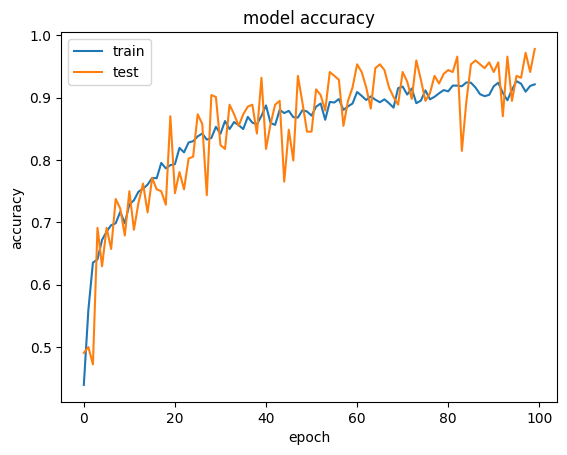

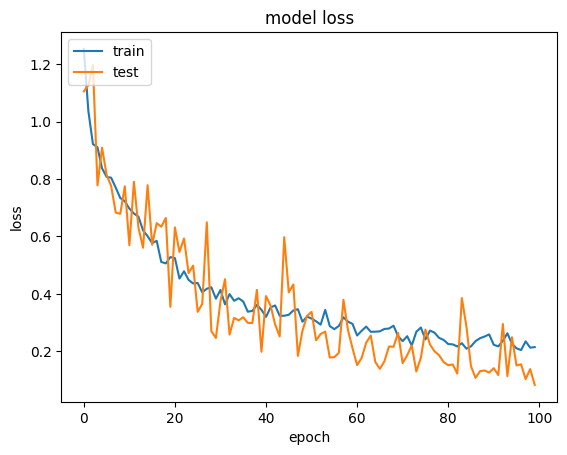

In [16]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
history.history

{'accuracy': [0.43926191329956055,
  0.5597129464149475,
  0.6355714797973633,
  0.6406970620155334,
  0.671963095664978,
  0.6852896213531494,
  0.695540726184845,
  0.698616087436676,
  0.7170681953430176,
  0.698616087436676,
  0.7288569808006287,
  0.7355202436447144,
  0.7493593096733093,
  0.7539723515510559,
  0.7606355547904968,
  0.7713992595672607,
  0.7708867192268372,
  0.795489490032196,
  0.7867760062217712,
  0.7919015884399414,
  0.7934392690658569,
  0.8195797204971313,
  0.8124039173126221,
  0.8282932043075562,
  0.8303434252738953,
  0.8380317687988281,
  0.8426448106765747,
  0.832906186580658,
  0.8354690074920654,
  0.8534085154533386,
  0.8421322107315063,
  0.862634539604187,
  0.849820613861084,
  0.8610968589782715,
  0.8559712767601013,
  0.849820613861084,
  0.8692978024482727,
  0.8600717782974243,
  0.8575089573860168,
  0.8708354830741882,
  0.8877498507499695,
  0.859559178352356,
  0.8564838767051697,
  0.8805740475654602,
  0.87544846534729,
  0.87903